In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 
from collections import defaultdict
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
df = pd.read_csv('../data/final-data.csv', sep='~')
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rym rating,ratings,reviews,popularity
count,7252.000000,7252.000000,7252.00000,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,7.252000e+03,7252.000000,7252.000000,6972.00000,6972.000000,7252.000000
mean,3625.500000,3625.500000,5895.86652,0.453320,0.521675,5.230971,-12.092938,0.628378,0.078403,0.416099,0.288986,0.187424,0.423436,116.587878,3.070066e+05,3.841975,3.890232,7550.44148,132.534423,35.110866
std,2093.616409,2093.616409,4311.79293,0.188403,0.290922,3.516420,6.450656,0.483271,0.103382,0.376112,0.368500,0.153149,0.269500,29.705730,2.103129e+05,0.498917,0.103352,9199.56536,174.816432,19.173895
min,0.000000,0.000000,0.00000,0.000000,0.000020,0.000000,-45.243000,0.000000,0.000000,0.000000,0.000000,0.015300,0.000000,0.000000,3.109600e+04,0.000000,3.650000,20.00000,1.000000,0.000000
25%,1812.750000,1812.750000,1954.75000,0.311000,0.276000,2.000000,-15.054250,0.000000,0.035400,0.029075,0.000047,0.095700,0.188000,94.005250,1.937262e+05,4.000000,3.820000,1295.00000,19.000000,22.000000
50%,3625.500000,3625.500000,5184.50000,0.450000,0.533500,5.000000,-10.552500,1.000000,0.044200,0.330000,0.024450,0.125000,0.402000,114.142000,2.559330e+05,4.000000,3.870000,4554.00000,76.000000,36.000000
75%,5438.250000,5438.250000,9540.50000,0.585000,0.773000,8.000000,-7.461500,1.000000,0.070400,0.815000,0.699000,0.228000,0.641000,135.107750,3.505030e+05,4.000000,3.940000,10074.00000,169.000000,49.000000
max,7251.000000,7251.000000,14357.00000,0.967000,1.000000,11.000000,3.744000,1.000000,0.962000,0.996000,1.000000,0.984000,0.984000,222.605000,3.682333e+06,5.000000,4.410000,74911.00000,1559.000000,87.000000


<AxesSubplot:>

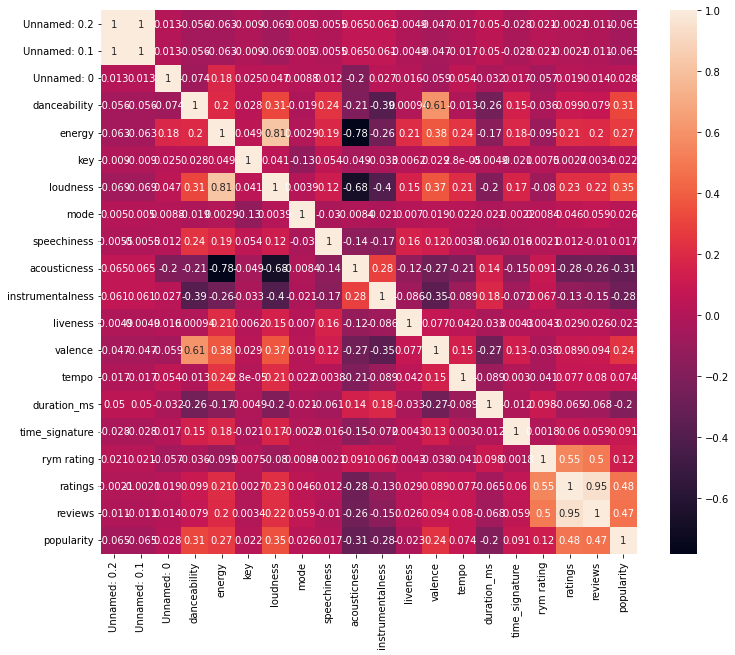

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [29]:
def get_genre_freq(d):
    genre_freq = defaultdict(int)
    for idx, row in d.iterrows():
        genre_freq[row['genre']] += 1
    return genre_freq
gf = get_genre_freq(df)
gf

defaultdict(int,
            {'NF': 2078,
             nan: 363,
             'hard rock': 156,
             'classical': 864,
             'alternative rock': 714,
             'hip hop': 365,
             'album rock': 674,
             'metal': 305,
             'classic rock': 330,
             'jazz': 437,
             'psychedelic rock': 23,
             'permanent wave': 87,
             'art rock': 402,
             'new wave': 162,
             'rock': 18,
             'folk': 144,
             'mellow gold': 13,
             'singer-songwriter': 3,
             'experimental': 102,
             'post-punk': 12})

<AxesSubplot:xlabel='genre'>

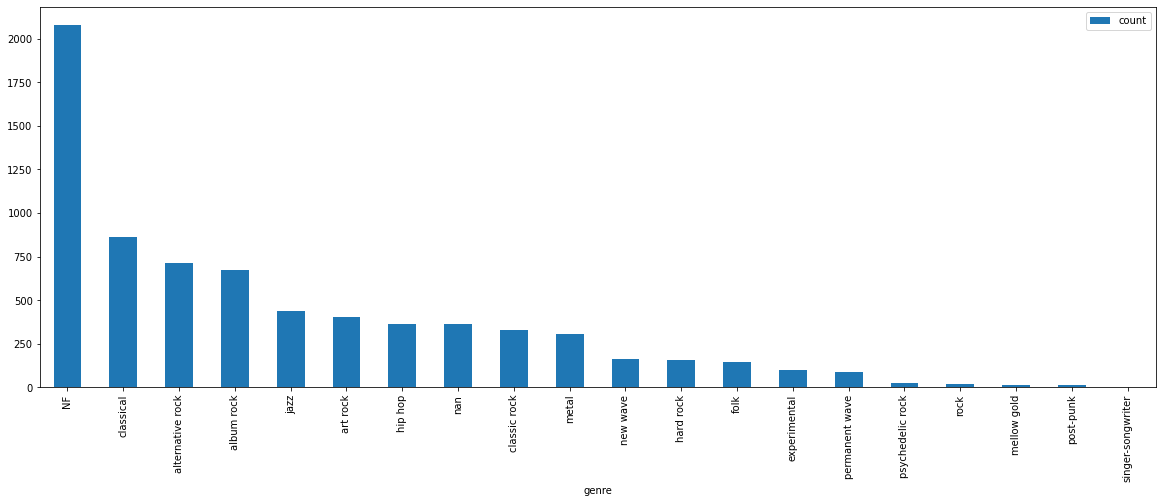

In [30]:
df_genres = pd.DataFrame.from_dict(gf.items())
df_genres.columns = ['genre','count']
df_genres.sort_values(by = ['count'],ascending=False,inplace=True)
df_genres_shortend= df_genres.head(100)
df_genres_shortend.plot.bar(x='genre',figsize=(20,7))
# df_genres.head(10)
# plt.plot(df, kind = 'bar')
# plt.show()

Our preliminary EDA shows there is a strong bias, on the top 20 songs from Rate Your Music's community. 

Text(0, 0.5, 'Count')

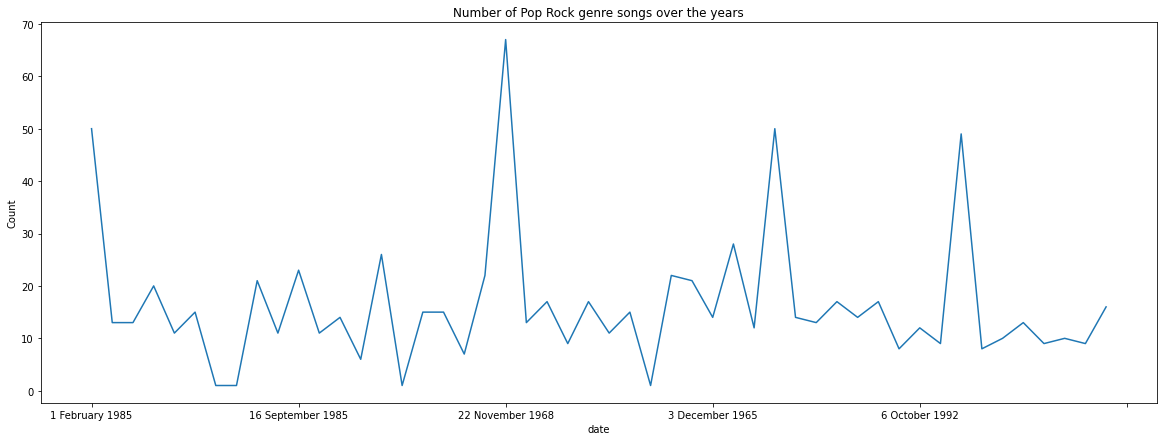

In [65]:
df_poprock = df.loc[df['genres'].str.contains( 'Pop Rock')]
ax = df_poprock.groupby(['date']).count()['key'].plot(figsize=(20,7), title = 'Number of Pop Rock Genre Songs Over the Years')
ax.set_ylabel('Count')

In [11]:
df[df['album'] == 'Kid A']['sp_genres'][2788]

"['alternative rock', 'art rock', 'melancholia', 'oxford indie', 'permanent wave', 'rock']"